In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from ipywidgets import interact

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.82G/1.82G [00:21<00:00, 90.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2


## 1.Сбор, подготовка данных, обобщение в меньшее кол-во классов (196 -> 9)

In [3]:
# Пути к разметке для train и test
train_labels_path = 'https://drive.google.com/uc?export=download&id=1Wh-NCRjBbONPL6kjs55jWvtyPdTwWdYi'
test_labels_path = 'https://drive.google.com/uc?export=download&id=1g0AQ8Gtku3EDjdCNqJLb3ewzJJoLZbOG'

# Пути к фото для train и test
train_images_path = '/root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_train/cars_train'
test_images_path = '/root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_test/cars_test'

# Обобщение в категории
general_categories = {
    'Sedan': ['Sedan'],
    'SUV': ['SUV'],
    'Coupe': ['Coupe'],
    'Convertible': ['Convertible'],
    'Hatchback': ['Hatchback'],
    'Minivan': ['Minivan'],
    'Van': ['Van'],
    'Truck': ['Crew Cab', 'Extended Cab', 'Regular Cab'],
}

# Функция для маппинга широкого спектра категорий на более общие
def map_to_general_category(class_name):
    for category, keywords in general_categories.items():
        if any(keyword in class_name for keyword in keywords):
            return category
    return 'Other'

# Загрузили и обработали таблицу с разметкой для train
df_train = pd.read_csv(train_labels_path)
df_train.rename(columns={'x1': 'boxx_1', 'y1': 'boxy_1', 'x2': 'boxx_2', 'y2': 'boxy_2', 'image': 'file_name', 'ture_class_name': 'class_name'}, inplace=True)
df_train['general_class_name'] = df_train['class_name'].apply(map_to_general_category)
df_train['general_class'] = pd.factorize(df_train['general_class_name'])[0] + 1

# Загрузили и обработали таблицу с разметкой для test
df_test = pd.read_csv(test_labels_path)
df_test.rename(columns={'x1': 'boxx_1', 'y1': 'boxy_1', 'x2': 'boxx_2', 'y2': 'boxy_2', 'image': 'file_name', 'ture_class_name': 'class_name'}, inplace=True)
df_test['general_class_name'] = df_test['class_name'].apply(map_to_general_category)
df_test['general_class'] = pd.factorize(df_test['general_class_name'])[0] + 1

In [4]:
print(f"Кол-во классов уменьшилось с {df_train['class_name'].nunique()} до {df_train['general_class_name'].nunique()}")

Кол-во классов уменьшилось с 196 до 9


In [5]:
df_train

,boxx_1,boxy_1,boxx_2,boxy_2,class,file_name,class_name,general_class_name,general_class
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012,Coupe,1
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012,Sedan,2
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007,Other,3
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,Sedan,2
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,Truck,4
...,...,...,...,...,...,...,...,...,...
8139,3,44,423,336,78,08140.jpg,Chrysler Town and Country Minivan 2012,Minivan,7
8140,138,150,706,523,196,08141.jpg,smart fortwo Convertible 2012,Convertible,5
8141,26,246,660,449,163,08142.jpg,Mercedes-Benz SL-Class Coupe 2009,Coupe,1
8142,78,526,1489,908,112,08143.jpg,Ford GT Coupe 2006,Coupe,1


In [6]:
df_test

,boxx_1,boxy_1,boxx_2,boxy_2,class,file_name,class_name,general_class_name,general_class
0,30,52,246,147,181,00001.jpg,Suzuki Aerio Sedan 2007,Sedan,1
1,100,19,576,203,103,00002.jpg,Ferrari 458 Italia Convertible 2012,Convertible,2
2,51,105,968,659,145,00003.jpg,Jeep Patriot SUV 2012,SUV,3
3,67,84,581,407,187,00004.jpg,Toyota Camry Sedan 2012,Sedan,1
4,140,151,593,339,185,00005.jpg,Tesla Model S Sedan 2012,Sedan,1
...,...,...,...,...,...,...,...,...,...
8036,49,57,1169,669,63,08037.jpg,Chevrolet Sonic Sedan 2012,Sedan,1
8037,23,18,640,459,16,08038.jpg,Audi V8 Sedan 1994,Sedan,1
8038,33,27,602,252,17,08039.jpg,Audi 100 Sedan 1994,Sedan,1
8039,33,142,521,376,38,08040.jpg,BMW Z4 Convertible 2012,Convertible,2


## 2. Анализ

### 2.1 Анализ распределения классов

In [7]:
df_train.groupby('general_class_name').agg({'general_class_name' : 'count'})

,general_class_name
general_class_name,
Convertible,1005
Coupe,1119
Hatchback,554
Minivan,250
Other,945
SUV,1437
Sedan,1907
Truck,636
Van,291


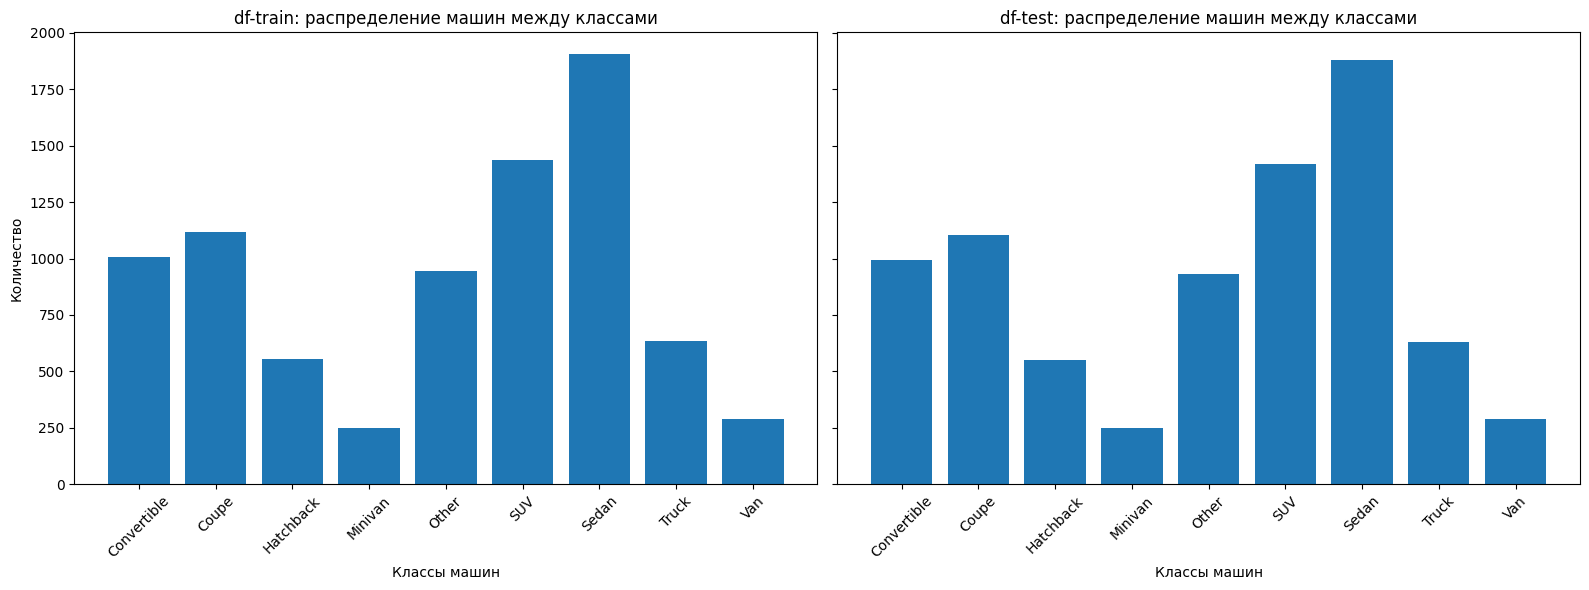

In [8]:
import matplotlib.pyplot as plt

# Группируем данные по general_class_name и считаем количество, затем сортируем по алфавиту
grouped_data_train = df_train.groupby('general_class_name')['general_class_name'].count().sort_index()
grouped_data_test = df_test.groupby('general_class_name')['general_class_name'].count().sort_index()

# Создаем два графика (сетка из 1 строки и 2 столбцов), y-ось будет общей
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Строим график для тренировочного набора данных
axes[0].bar(grouped_data_train.index, grouped_data_train.values)
axes[0].set_title("df-train: распределение машин между классами")
axes[0].set_xlabel("Классы машин")
axes[0].set_ylabel("Количество")
axes[0].tick_params(axis='x', rotation=45)  # Поворачиваем подписи оси x для удобства чтения

# Строим график для тестового набора данных
axes[1].bar(grouped_data_test.index, grouped_data_test.values)
axes[1].set_title("df-test: распределение машин между классами")
axes[1].set_xlabel("Классы машин")
axes[1].tick_params(axis='x', rotation=45)  # Поворачиваем подписи оси x для удобства чтения

# Настраиваем плотное расположение графиков для предотвращения наложений
plt.tight_layout()
plt.show()

### 2.2 Анализ размера объектов

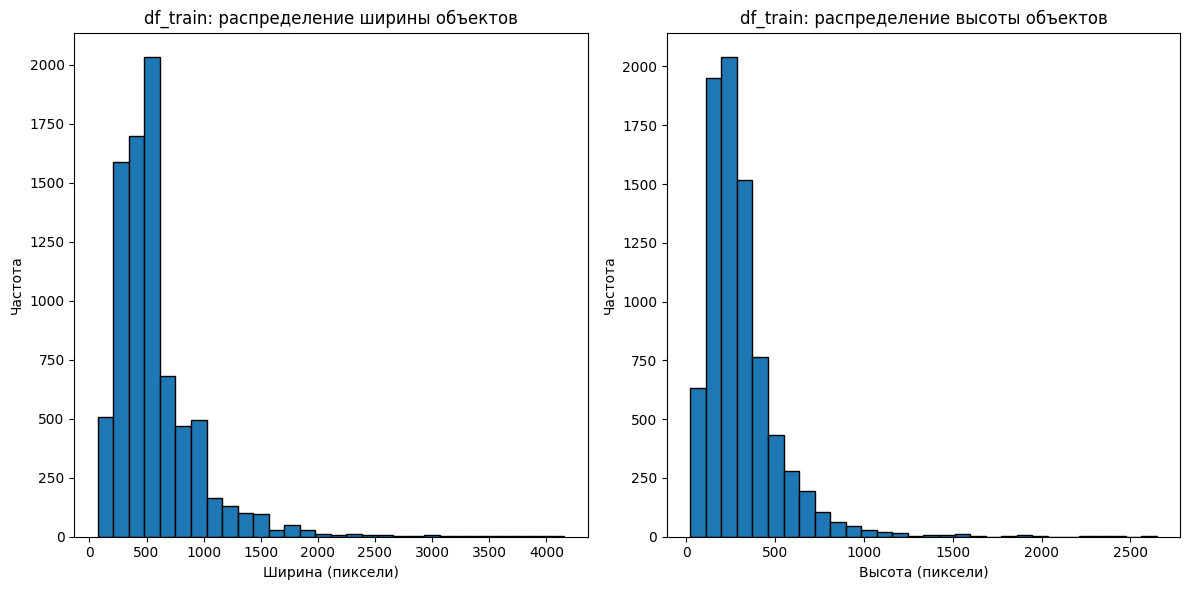

In [9]:
# Отображение размерности объектов df_train

df_train_size = df_train.copy()

df_train_size['width'] = df_train_size['boxx_2'] - df_train_size['boxx_1']
df_train_size['height'] = df_train_size['boxy_2'] - df_train_size['boxy_1']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_train_size['width'], bins=30, edgecolor='black')
plt.title('df_train: распределение ширины объектов')
plt.xlabel('Ширина (пиксели)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df_train_size['height'], bins=30, edgecolor='black')
plt.title('df_train: распределение высоты объектов')
plt.xlabel('Высота (пиксели)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

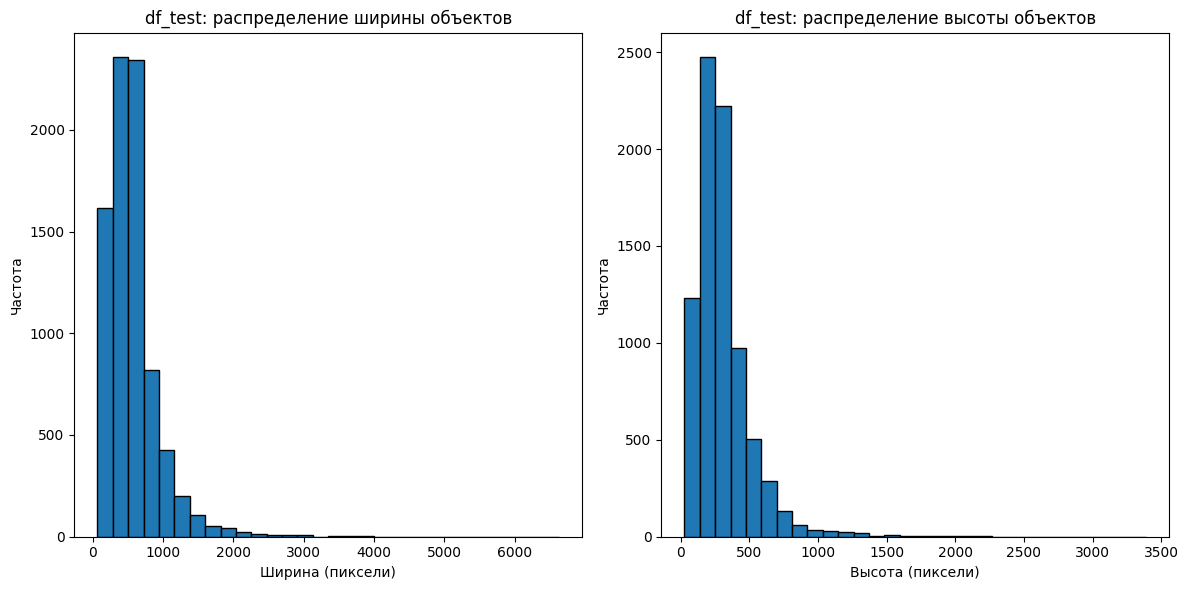

In [10]:
# Отображение размерности объектов df_test

df_test_size = df_test.copy()

df_test_size['width'] = df_test_size['boxx_2'] - df_test_size['boxx_1']
df_test_size['height'] = df_test_size['boxy_2'] - df_test_size['boxy_1']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_test_size['width'], bins=30, edgecolor='black')
plt.title('df_test: распределение ширины объектов')
plt.xlabel('Ширина (пиксели)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df_test_size['height'], bins=30, edgecolor='black')
plt.title('df_test: распределение высоты объектов')
plt.xlabel('Высота (пиксели)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

## 3. Визуализация аннотаций

In [11]:
# Функция для получение пути фото
def get_image_path(filename, dataset='train'):
    if dataset == 'train':
        return f"{train_images_path}/{filename}"
    else:
        return f"{test_images_path}/{filename}"

# Функция для получения картинки с аннотацией
def show_image_with_annotation(idx, dataset='train'):
    if dataset == 'train':
        row = df_train.iloc[idx]
    else:
        row = df_test.iloc[idx]

    img_path = get_image_path(row['file_name'], dataset)
    img = Image.open(img_path)

    draw = ImageDraw.Draw(img)
    bbox = (row['boxx_1'], row['boxy_1'], row['boxx_2'], row['boxy_2'])
    draw.rectangle(bbox, outline="red", width=3)
    draw.text((row['boxx_1'], row['boxy_1'] - 10), row['general_class_name'], fill="red")

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Create interactive sliders for train and test
print("Train Set Visualization:")
interact(show_image_with_annotation, idx=(0, len(df_train) - 1), dataset='train')

print("Test Set Visualization:")
interact(show_image_with_annotation, idx=(0, len(df_test) - 1), dataset='test')

Train Set Visualization:


interactive(children=(IntSlider(value=4071, description='idx', max=8143), Text(value='train', description='dat…

interactive(children=(IntSlider(value=4020, description='idx', max=8040), Text(value='test', description='data…

<function __main__.show_image_with_annotation(idx, dataset='train')>

## 3.1 Скачиваем YOLOv5 и YOLOv8

### 3.1.1 YOLOv5:

In [12]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 29), reused 30 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.69 MiB | 17.52 MiB/s, done.
Resolving deltas: 100% (11723/11723), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 28.7 MB/s eta 0:00:00


### 3.1.2 YOLOv8:

In [13]:
# Install YOLOv8
!pip install ultralytics

## 3.2 Доимпортируем необходимые библиотеки и указываем нужные пути

In [14]:
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split

### 3.2.1 Указываем ссылки для train и test к .csv файлам с аннотациями и фотографиям:

In [15]:
csv_train_labels = 'https://drive.google.com/uc?export=download&id=1Wh-NCRjBbONPL6kjs55jWvtyPdTwWdYi'
csv_test_labels = 'https://drive.google.com/uc?export=download&id=1g0AQ8Gtku3EDjdCNqJLb3ewzJJoLZbOG'

train_images = '/root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_train/cars_train'
test_images = '/root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_test/cars_test'

### 3.2.2 Создаем пути (папки) для train и test для .txt файлов с аннотациями и фотографий:

In [16]:
yolo_train_labels = '/content/dataset/train/labels'
yolo_test_labels = '/content/dataset/test/labels'

os.makedirs(yolo_train_labels, exist_ok=True)
os.makedirs(yolo_test_labels, exist_ok=True)

yolo_train_images = '/content/dataset/train/images'
yolo_test_images = '/content/dataset/test/images'

os.makedirs(yolo_train_images, exist_ok=True)
os.makedirs(yolo_test_images, exist_ok=True)

def move_images(source_dir, dest_dir):
    for file_name in os.listdir(source_dir):
        if file_name.endswith('.jpg'):
            src_file_path = os.path.join(source_dir, file_name)
            dest_file_path = os.path.join(dest_dir, file_name)
            shutil.move(src_file_path, dest_file_path)

move_images(train_images, yolo_train_images)
move_images(test_images, yolo_test_images)

## 3.3 Подготовка данных для обучения

### 3.3.1 Маппинг номера для каждого выведенного класса:

In [17]:
general_class_names = sorted(df_train['general_class_name'].unique())
class_mappings = {name: idx for idx, name in enumerate(general_class_names)}
print("Class mappings:")
print("")
for elem in class_mappings:
    print(f"{elem}: {class_mappings[elem]}")

Class mappings:

Convertible: 0
Coupe: 1
Hatchback: 2
Minivan: 3
Other: 4
SUV: 5
Sedan: 6
Truck: 7
Van: 8


In [18]:
len(class_mappings)

9

### 3.3.2 Создание .txt файлов с аннотациями в формате YOLO:

In [19]:
# Функция для преобразования координат в YOLO формат
def convert_to_yolo_format(row, image_width, image_height):
    x_center = (row['boxx_1'] + row['boxx_2']) / 2 / image_width
    y_center = (row['boxy_1'] + row['boxy_2']) / 2 / image_height
    width = (row['boxx_2'] - row['boxx_1']) / image_width
    height = (row['boxy_2'] - row['boxy_1']) / image_height
    return f"{class_mappings[row['general_class_name']]} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"

# Функция для обработки CSV и сохранения .txt файлов
def process_csv_to_yolo(csv_path, labels_dir, images_dir):
    # Загружаем CSV файл
    df = pd.read_csv(csv_path)
    df['general_class_name'] = df['class_name'].apply(map_to_general_category)
    # Для каждой строки проверяем соответствующий файл изображения
    for _, row in df.iterrows():
        image_name = row['file_name']
        image_path = os.path.join(images_dir, image_name)

        # Используем PIL, чтобы узнать размеры изображения
        from PIL import Image
        with Image.open(image_path) as img:
            image_width, image_height = img.size

        # Преобразуем аннотацию в YOLO формат
        yolo_annotation = convert_to_yolo_format(row, image_width, image_height)

        # Генерируем путь для сохранения аннотации
        label_file = os.path.join(labels_dir, image_name.replace('.jpg', '.txt'))

        # Сохраняем аннотацию в файл
        with open(label_file, 'w') as f:
            f.write(yolo_annotation + '\n')

# Обрабатываем тренировочные и тестовые данные
process_csv_to_yolo(csv_train_labels, yolo_train_labels, yolo_train_images)
process_csv_to_yolo(csv_test_labels, yolo_test_labels, yolo_test_images)

### 3.3.4 Добавление data.yaml файла:

In [20]:
data_yaml = """
train: /content/dataset/train/images
val: /content/dataset/test/images
nc: {num_classes}
names: {class_names}
"""
with open('/content/dataset/data.yaml', 'w') as f:
    f.write(data_yaml.format(
        num_classes=len(class_mappings),
        class_names=list(class_mappings.keys())
    ))

In [21]:
import os

# Directories for labels
train_labels_dir = '/content/dataset/train/labels'
test_labels_dir = '/content/dataset/test/labels'

# Function to validate class IDs in YOLO label files
def validate_label_files(labels_dir, num_classes):
    invalid_files = []
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):
            with open(os.path.join(labels_dir, label_file), 'r') as f:
                for line in f:
                    class_id = int(line.split()[0])  # Extract class ID
                    if class_id >= num_classes:  # Check if class ID is out of range
                        invalid_files.append((label_file, class_id))
    return invalid_files

# Check training and validation labels
train_invalid = validate_label_files(train_labels_dir, num_classes=9)
test_invalid = validate_label_files(test_labels_dir, num_classes=9)

print("Invalid class IDs in training labels:", train_invalid)
print("Invalid class IDs in validation labels:", test_invalid)


Invalid class IDs in training labels: []
Invalid class IDs in validation labels: []


## 3.4 Обучение

### 3.4.1 YOLOv5 training:

In [22]:
!python train.py --img 640 --batch 16 --epochs 3 --data /content/dataset/data.yaml --weights yolov5s.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-11 20:15:23.617414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 20:15:23.651675: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-11 20:15:23.662668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

### 3.4.2 YOLOv8 training:

In [23]:
from ultralytics import YOLO

# Загружаем предобученную модель YOLOv8
model = YOLO('yolov8n.pt')

# Тренировка
model.train(data='/content/dataset/data.yaml', epochs=2, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 122MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 5.35M/5.35M [00:00<00:00, 124MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 8144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8144/8144 [00:04<00:00, 1807.66it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/test/labels... 8041 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8041/8041 [00:05<00:00, 1355.86it/s]


val: New cache created: /content/dataset/test/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2      2.19G     0.5621      2.233      1.111         45        640: 100%|██████████| 509/509 [03:14<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [01:14<00:00,  3.37it/s]


                   all       8041       8041      0.357      0.563      0.447      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2      2.21G     0.5145      1.546      1.064         42        640: 100%|██████████| 509/509 [03:01<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [01:14<00:00,  3.39it/s]


                   all       8041       8041      0.511      0.692      0.633      0.576

2 epochs completed in 0.148 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 252/252 [01:21<00:00,  3.08it/s]


                   all       8041       8041      0.511      0.692      0.633      0.576
           Convertible        992        992      0.729      0.771      0.817      0.733
                 Coupe       1106       1106      0.396      0.812      0.577      0.509
             Hatchback        549        549      0.318      0.222      0.252      0.234
               Minivan        248        248      0.255      0.685       0.43      0.395
                 Other        932        932      0.363      0.139      0.272      0.246
                   SUV       1418       1418      0.641      0.922      0.888      0.827
                 Sedan       1880       1880      0.467      0.937      0.712      0.654
                 Truck        629        629      0.694      0.847      0.834      0.768
                   Van        287        287      0.732      0.892      0.914      0.813
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b89168a4430>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [24]:
# Проверка модели на тестовых данных
metrics = model.val(data='/content/dataset/data.yaml')
print(metrics)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/test/labels.cache... 8041 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8041/8041 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [01:31<00:00,  5.47it/s]


                   all       8041       8041      0.511      0.691      0.632      0.575
           Convertible        992        992      0.733      0.769      0.818      0.733
                 Coupe       1106       1106      0.397      0.809      0.575      0.507
             Hatchback        549        549       0.32       0.22      0.252      0.234
               Minivan        248        248      0.254      0.685      0.427      0.393
                 Other        932        932      0.356      0.135      0.272      0.246
                   SUV       1418       1418      0.642      0.922      0.889      0.828
                 Sedan       1880       1880      0.467      0.937      0.712      0.654
                 Truck        629        629      0.697      0.847      0.834      0.769
                   Van        287        287      0.736      0.892      0.914      0.811
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect

## 3.5 Проверка результатов

### 3.5.1 YOLOv5:

In [26]:
!python detect.py --weights runs/train/exp/weights/best.pt --source /content/dataset/test/images --save-txt --save-conf

Выходные данные были обрезаны до нескольких последних строк (5000).
image 3045/8041 /content/dataset/test/images/03045.jpg: 512x640 (no detections), 10.9ms
image 3046/8041 /content/dataset/test/images/03046.jpg: 384x640 (no detections), 13.7ms
image 3047/8041 /content/dataset/test/images/03047.jpg: 448x640 (no detections), 7.8ms
image 3048/8041 /content/dataset/test/images/03048.jpg: 448x640 1 Coupe, 7.7ms
image 3049/8041 /content/dataset/test/images/03049.jpg: 480x640 1 SUV, 8.0ms
image 3050/8041 /content/dataset/test/images/03050.jpg: 480x640 1 SUV, 7.8ms
image 3051/8041 /content/dataset/test/images/03051.jpg: 352x640 (no detections), 6.5ms
image 3052/8041 /content/dataset/test/images/03052.jpg: 480x640 1 SUV, 1 Truck, 7.9ms
image 3053/8041 /content/dataset/test/images/03053.jpg: 480x640 1 Sedan, 7.8ms
image 3054/8041 /content/dataset/test/images/03054.jpg: 288x640 1 SUV, 6.4ms
image 3055/8041 /content/dataset/test/images/03055.jpg: 480x640 1 Sedan, 7.9ms
image 3056/8041 /content/dat

### 3.5.2 YOLOv8:

In [27]:
results = model.predict(source='/content/dataset/test/images', conf=0.5, save=True)

print(results)

Выходные данные были обрезаны до нескольких последних строк (5000).
image 190/8041 /content/dataset/test/images/00190.jpg: 448x640 1 Sedan, 7.2ms
image 191/8041 /content/dataset/test/images/00191.jpg: 448x640 (no detections), 6.7ms
image 192/8041 /content/dataset/test/images/00192.jpg: 416x640 1 Sedan, 7.4ms
image 193/8041 /content/dataset/test/images/00193.jpg: 480x640 1 Sedan, 7.1ms
image 194/8041 /content/dataset/test/images/00194.jpg: 480x640 1 SUV, 6.4ms
image 195/8041 /content/dataset/test/images/00195.jpg: 480x640 1 Sedan, 6.9ms
image 196/8041 /content/dataset/test/images/00196.jpg: 480x640 1 Coupe, 7.0ms
image 197/8041 /content/dataset/test/images/00197.jpg: 480x640 1 Minivan, 6.3ms
image 198/8041 /content/dataset/test/images/00198.jpg: 320x640 1 Coupe, 7.3ms
image 199/8041 /content/dataset/test/images/00199.jpg: 416x640 1 SUV, 7.0ms
image 200/8041 /content/dataset/test/images/00200.jpg: 448x640 1 Coupe, 6.9ms
image 201/8041 /content/dataset/test/images/00201.jpg: 448x640 (no d

KeyboardInterrupt: 